In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fertilizerdataset.csv")

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Fertilizer
0,100,40,50,6.0,800,25,DAP
1,105,40,50,6.0,800,25,DAP
2,110,40,50,6.0,800,25,DAP
3,115,40,50,6.0,800,25,DAP
4,120,40,50,6.0,800,25,DAP


In [4]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,117.615385,56.730769,60.769231,6.956154,827.692308,28.076923
std,14.425508,14.670384,10.319651,0.732264,158.971746,6.218437
min,100.000000,20.000000,40.000000,6.000000,500.000000,10.000000
25%,105.000000,45.000000,55.000000,6.500000,800.000000,25.000000
50%,115.000000,60.000000,60.000000,7.000000,900.000000,30.000000
75%,125.000000,70.000000,70.000000,7.500000,1000.000000,35.000000
max,150.000000,80.000000,80.000000,8.500000,1000.000000,35.000000


In [5]:
df['Fertilizer'].unique()

array(['DAP', 'Magnesium Sulphate', '13:32:26 NPK', '12:32:16 NPK'],
      dtype=object)

<Axes: xlabel='Fertilizer', ylabel='count'>

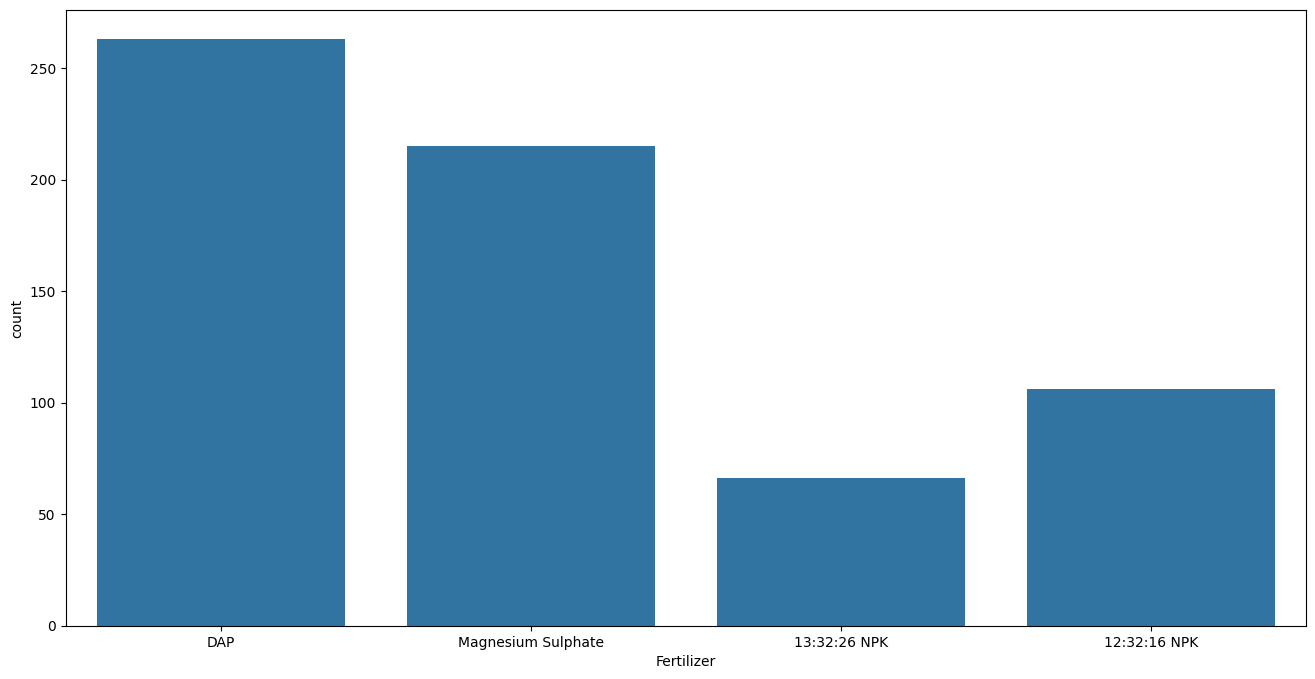

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer', data = df)

In [7]:
X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train[0]

array([-0.54943823,  0.19707807, -0.59335192, -0.64973663,  0.45919125,
        0.31264035])

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[27  0  2  0]
 [ 0 17  0  0]
 [ 0  0 87  0]
 [ 0  0  2 61]]


0.9795918367346939

In [14]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer']=encode_ferti.fit_transform(df['Fertilizer'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
12:32:16 NPK,0
13:32:26 NPK,1
DAP,2
Magnesium Sulphate,3


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer']),df['Fertilizer'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (520, 6), y_train = (520,), x_test = (130, 6), y_test = (130,)


In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 355 to 37
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     520 non-null    int64  
 1   Phosphorus   520 non-null    int64  
 2   Potassium    520 non-null    int64  
 3   pH           520 non-null    float64
 4   Rainfall     520 non-null    int64  
 5   Temperature  520 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 28.4 KB


In [17]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
pred_rand = rand.predict(x_test)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       1.00      1.00      1.00        11
           2       0.88      0.91      0.90        57
           3       0.88      0.95      0.91        39

    accuracy                           0.91       130
   macro avg       0.94      0.91      0.92       130
weighted avg       0.91      0.91      0.91       130

Best score :  0.8155493544172038
Best params :  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500}


In [20]:
import pickle
pickle_out = open('randomforest_model.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [23]:
model = pickle.load(open('randomforest_model.pkl', 'rb'))
ans = model.predict([[12,10,13,8,800,25]])
ans

array([0])

In [24]:
k=encode_ferti.inverse_transform(ans)

In [25]:
k[0]

'12:32:16 NPK'

In [31]:
model = pickle.load(open('randomforest_model.pkl', 'rb'))
ans = model.predict([[12,10,13,8,800,25]])
if ans[0] == 0:
    print("TEN-TWENTY SIX-TWENTY SIX")
elif ans[0] == 1:
    print("Fourteen-Thirty Five-Fourteen")
elif ans[0] == 2:
    print("Seventeen-Seventeen-Seventeen")   
elif ans[0] == 3:
    print("TWENTY-TWENTY")
elif ans[0] == 4:
    print("TWENTY EIGHT-TWENTY EIGHT")
elif ans[0] == 5:
    print("DAP")
else:
    print("UREA")

TEN-TWENTY SIX-TWENTY SIX
